# Titanic data EDA and Prediction

**Data description**

Here we have 12 columns-

**PassengerId** : ID of Passenger

**Pclass** : Passenger class (1=1st,2=2nd,3=3rd)

**Survived** : Survival (0=No,1=Yes)

**Sex** : sex(male & female)

**Name** : name of passengers

**Age** : age of passengers

**Sibsp** : Number of Siblings

**Parch** : Number of Parents

**Ticket** : passenger ticket number

**Fare** : Passenger fare(British pound)

**Cabin** : cabin

**Embarked** : Port of Embarkation(C=Cherbourg ,Q=Queenstown, S=Southamption)





In [1]:
#importing usefull lib

import numpy as np
import pandas as pd
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#reading the data using pandas read_csv. 
#It's ofthen used pandas fuction to read csc file.
import pandas as pd
df1=pd.read_csv("../input/titanic/train.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape of data frame
df1.shape

(891, 12)

In [4]:
#here we check mean,std,quantiles value using pandas describe function
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#extracting all columns from the data frame for forother uses
df1.columns.tolist()


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
#count NA values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#dropng unrelated column
#here we going to drop cabin bcz it's have lots of nan vales
#here is nothing use in traing og passenger id so simply we drop it using pandas drop()
df=df1.drop(["PassengerId","Ticket","Cabin"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
#filing NA values
#here we filling na values by mean() for numerical values 
#and mode() for categorical 
df["Age"].fillna(df["Age"].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Exploratory Data Analysis

Number of people dead as 0 are 549 and Number of people survived as 1 are 342


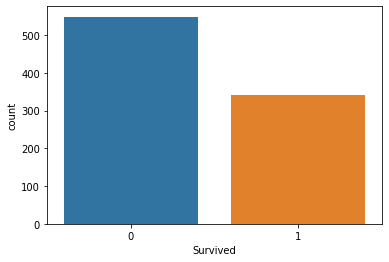

In [11]:
print(f'Number of people dead as 0 are {df.Survived.value_counts()[0]} and Number of people survived as 1 are {df.Survived.value_counts()[1]}')
sns.countplot(df["Survived"])
plt.show()


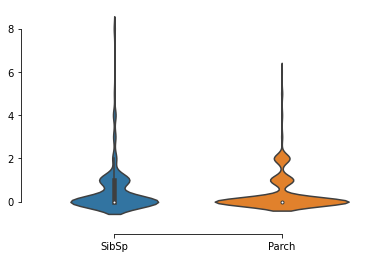

In [12]:

#here wr checking outliers 
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,5:7])
sns.despine(offset=10,trim=True)

<AxesSubplot:>

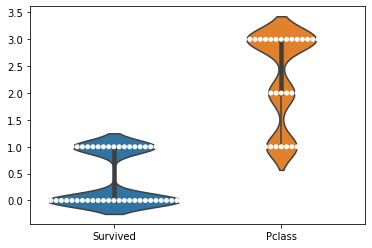

In [13]:
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,0:2])
#sns.despine(offset=10,trim=True)
sns.swarmplot(data=df.iloc[:,0:2],color="white")


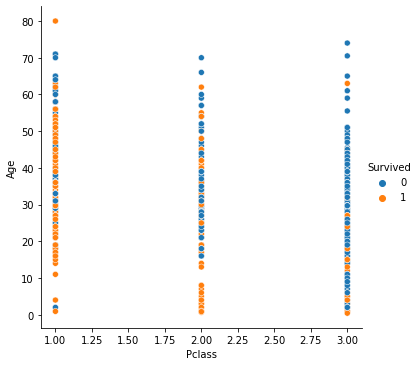

In [14]:
#here we going to ploat scaterplot to see data distirbution
sns.relplot(x="Pclass",y="Age",hue="Survived",data=df);

In [15]:
#visualisation how many pasanger survived and how many dead
#here we creat a function for bar_chart 
#for avoiding write same code for defrent columns

def bar_chart(column):
    survived=df[df["Survived"]==1][column].value_counts()
    dead=df[df["Survived"]==0][column].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    df1.plot(kind="bar",figsize=(10,5))

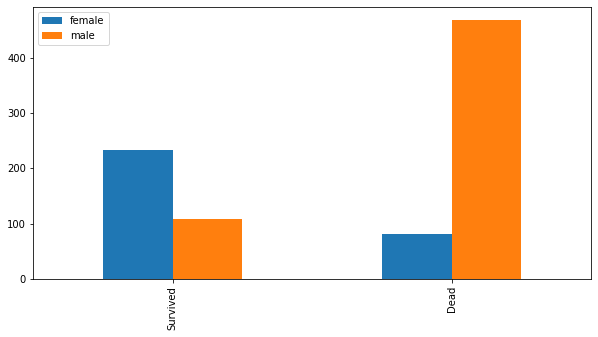

In [16]:
#here we make a bar chart on sex column
#for checking how many male & female
bar_chart("Sex")

**In the above chart we can essly analyse that females have more chance to survived.**

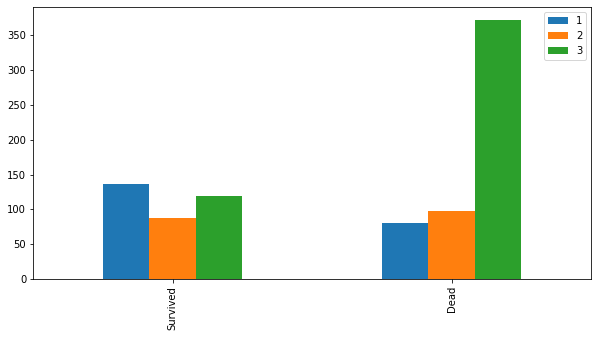

In [17]:
#here we going to make bar char on Pclass
bar_chart("Pclass")

**by the above chart on Pclass we can say that 1st class passenger have more chance to survived**

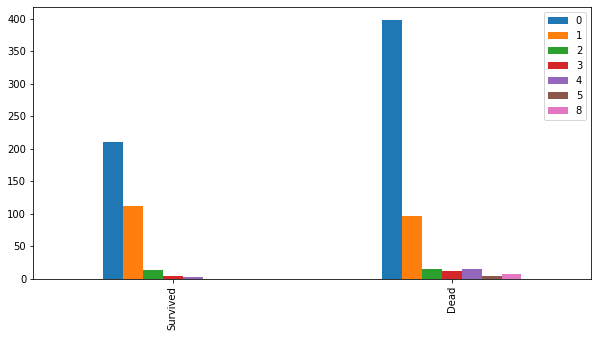

In [18]:
#here we going to make bar chart on sibsp
bar_chart("SibSp")

**by above chart we can analyes that there is more chance to survivrd those who have 0 or 1 siblings**

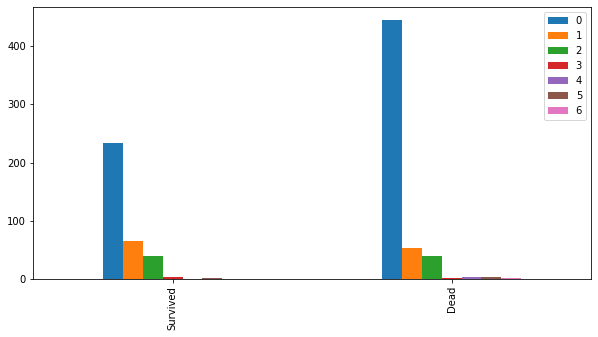

In [19]:
bar_chart("Parch")

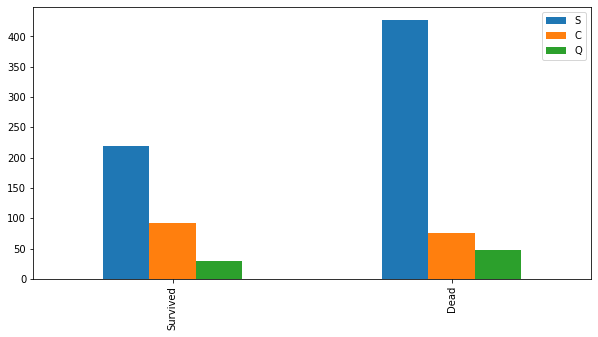

In [20]:
bar_chart("Embarked")

**by the above chart we can say that there are more chance to survived for those who bord from Southamption**

**Passenger traveilling from Cherbourg port survived more than other port passenger**

**Dedacting outliers and removing them**

In [21]:
#visualisation data on boxplot to see the outliers
def box_plot(column):
    df.boxplot(by="Survived",column=[column],grid=True)



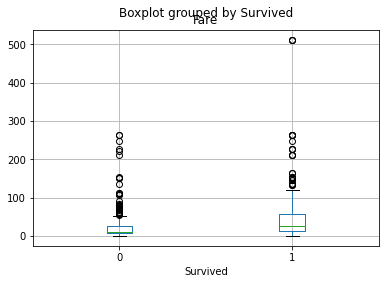

In [22]:
box_plot("Fare")

here we can see outliers above the 100 we can considerd them as outlier

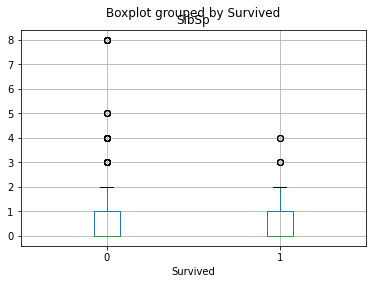

In [23]:
#checking outliers on Sibsp column
box_plot("SibSp")

by above chart we consider more then 5 siblings as outlierS

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x7f4325b67450>>

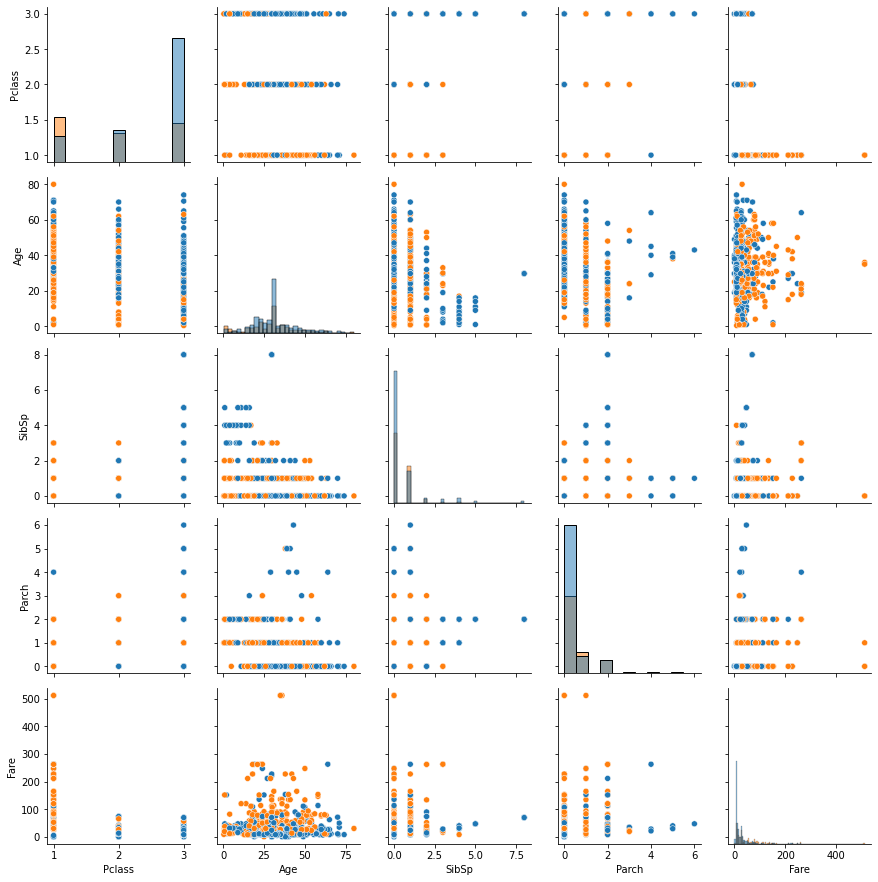

In [24]:
#ploting pair plot
g=sns.PairGrid(df,hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

In [25]:
#by value_counts we can see total unique values
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
#here we chacking largest values row on column Sibsp
df.nlargest(12,["SibSp"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,69.55,S
324,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,69.55,S
59,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,46.90,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,46.90,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,46.90,S


In [27]:
#now we gpoing to remove outliers
df=df.drop([159,180,201,324,792,846,863])
df.shape


(884, 9)

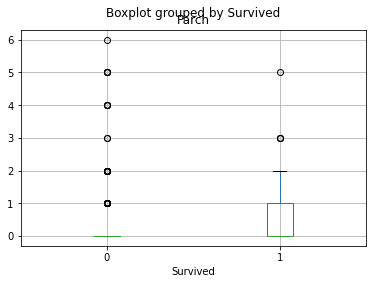

In [28]:
#here we going to check outliers on parch
box_plot("Parch")

In [29]:
df["Parch"].value_counts()

0    678
1    118
2     73
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
df.nlargest(12,["Parch"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,S
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,31.2750,S
638,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,39.6875,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,27.9000,S
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S


In [31]:
df=df.drop([678])
df.shape


(883, 9)

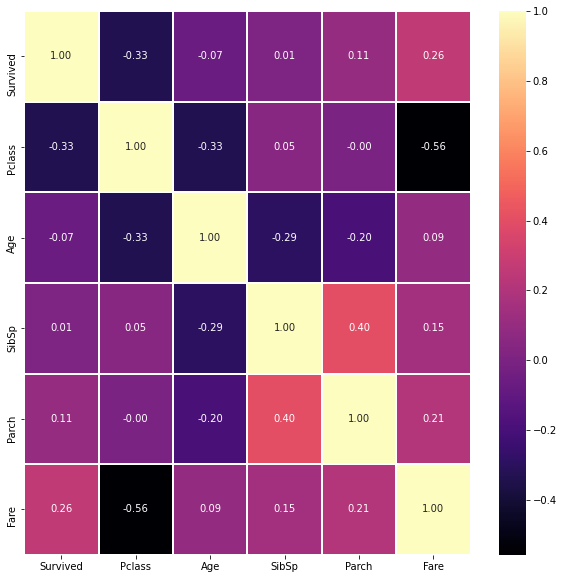

In [32]:
#here we going to drow heatmap to check co relation between columns 

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

**Frome EDA we got**
* Cabin column have lots of null values so we drop it,
* Ticket and paddenger Id is not usefull and does not have impact on survivl so drop it.
* Passenger travelling in higher class have more chance to survived
* Females survived more then Males.
* In the 1st class Females were more then Males it is also a resion that females have more chance to survived.
* Passenger travelling with siblings ,parents have more chance to survived.
* Passenger traveilling from Cherbourg port survived more than other port passenger.


**making title feature using Name**

In [33]:
df["Title"]=df["Name"].str.split(',',expand=True)[1].str.split('.',expand=True)[0]


In [34]:
df["Title"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

**now we can replace many titles with a more comman name as Rare**

In [35]:
df["Title"]=df["Title"].replace([" Don"," Rev"," Dr"," Major"," Lady"," Sir"," Col"," Capt"," the Countess"," Jonkheer"],"Rare")
df["Title"]=df["Title"].replace([" Mlle", " Ms"]," Miss")
df["Title"]=df["Title"].replace([" Mme"," Mrs"]," Mr")

In [36]:
df["Title"].unique()

array([' Mr', ' Miss', ' Master', 'Rare'], dtype=object)

In [37]:
#droping an relevant columns
#dividing data X(features) and Y(outcome)
X=df.drop(["Fare","Survived","Age","Name"],axis=True)
y=df["Survived"]

In [38]:
print(X.shape)
print(y.shape)

(883, 6)
(883,)


In [39]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title
0,3,male,1,0,S,Mr
1,1,female,1,0,C,Mr
2,3,female,0,0,S,Miss
3,1,female,1,0,S,Mr
4,3,male,0,0,S,Mr


**Feature Engineering**

In [40]:
#Here we encode Embarked in Rank
X.loc[X['Embarked'] == "C", 'Embarked'] = 0
X.loc[X['Embarked'] == "Q", 'Embarked'] = 1
X.loc[X['Embarked'] == "S", 'Embarked'] = 2


In [41]:
mapping={' Mr':0, ' Miss':1, ' Master':2, 'Rare':3}
X["Title"]=X["Title"].map(mapping)

In [42]:
#Here we encode Sex in Rank
X.loc[X['Sex'] == "female", 'Sex'] = 0
X.loc[X['Sex'] == "male", 'Sex'] = 1

In [43]:
X.head()


,Pclass,Sex,SibSp,Parch,Embarked,Title
0,3,1,1,0,2,0
1,1,0,1,0,0,0
2,3,0,0,0,2,1
3,1,0,1,0,2,0
4,3,1,0,0,2,0


In [44]:
X.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

**Model building**

In [45]:
#here we going to split data in traing set and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

**Training LogisticRegression**

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=40)
lr.fit(x_train,y_train)

print(lr.score(x_test,y_test))

0.8361581920903954


**Training DecisionTreeClassifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [48]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'splitter': 'random'}

In [49]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 6,
                             min_samples_split = 8, splitter = 'random')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=8, splitter='random')

In [50]:
# accuracy score
print(dtc.score(x_test,y_test))


0.8587570621468926


# Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [52]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [53]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [54]:
# accuracy score
print(gbc.score(x_test,y_test))


0.8587570621468926


**Traing RandomForestClassifier**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=40,min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001)

rfc.fit(x_train,y_train)

#print(rfc.score(x_test,y_test))

RandomForestClassifier(min_impurity_decrease=0.002,
                       min_weight_fraction_leaf=0.001, random_state=40)

In [56]:
print(rfc.score(x_test,y_test))

0.8531073446327684


#  Support Vector Classifier (SVC)

In [57]:
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [58]:
# best parameters

grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [59]:
svc = SVC(C = 1, gamma = 0.1)
svc.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

In [60]:
print(svc.score(x_test,y_test))

0.8587570621468926


# K Neighbors Classifier (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [62]:
print(knn.score(x_test,y_test))

0.847457627118644


In [63]:
key = ['LogisticRegression','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','SVC','KNeighborsClassifier']
model=[lr,dtc,gbc,rfc,svc,knn]

In [64]:
score=[]
for i in model:
    sco = i.score(x_test,y_test)
    score.append(sco)
print(score)

[0.8361581920903954, 0.8587570621468926, 0.8587570621468926, 0.8531073446327684, 0.8587570621468926, 0.847457627118644]


<AxesSubplot:>

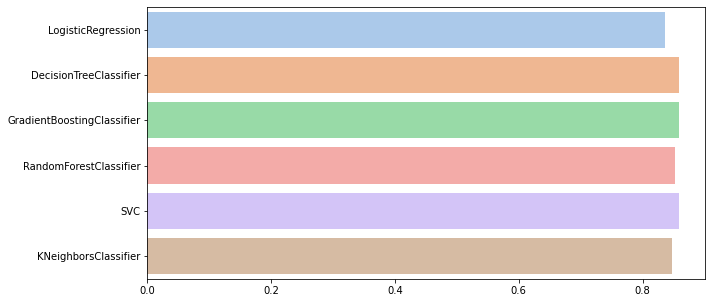

In [65]:
plt.figure(figsize = (10,5))
sns.barplot(x = score, y = key, palette='pastel')

## finaly we chose over best model **GradientBoostingClassifier** for prediction

# Prediction on Test data
**clean and feature selection same as training**

In [66]:

df2=pd.read_csv("../input/titanic/test.csv")

df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
df2["Title"]=df2["Name"].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
df2["Title"]=df2["Title"].replace([" Don"," Rev"," Dr"," Major"," Lady"," Sir"," Col"," Capt"," the Countess"," Jonkheer"],"Rare")
df2["Title"]=df2["Title"].replace([" Mlle", " Ms"," Dona"]," Miss")
df2["Title"]=df2["Title"].replace([" Mme"," Mrs"]," Mr")
df2["Title"].unique()

array([' Mr', ' Miss', ' Master', 'Rare'], dtype=object)

In [68]:
mapping={' Mr':0, ' Miss':1, ' Master':2, 'Rare':3}
df2["Title"]=df2["Title"].map(mapping)

In [69]:
new_x=df2.drop(["Cabin","PassengerId","Fare","Age","Name","Ticket"],axis=True)
new_x.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title
0,3,male,0,0,Q,0
1,3,female,1,0,S,0
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,0


In [70]:
new_x.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

In [71]:
#Here we encode Embarked in Rank
new_x.loc[new_x['Embarked'] == "C", 'Embarked'] = 0
new_x.loc[new_x['Embarked'] == "Q", 'Embarked'] = 1
new_x.loc[new_x['Embarked'] == "S", 'Embarked'] = 2

In [72]:
new_x.loc[new_x['Sex'] == "female", 'Sex'] = 0
new_x.loc[new_x['Sex'] == "male", 'Sex'] = 1

In [73]:

new_x.head()


,Pclass,Sex,SibSp,Parch,Embarked,Title
0,3,1,0,0,1,0
1,3,0,1,0,2,0
2,2,1,0,0,1,0
3,3,1,0,0,2,0
4,3,0,1,1,2,0


In [74]:
#here we used over best train model
new_predict=gbc.predict(new_x)
print(new_predict)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 0 0 1]


In [75]:
vip=np.array(new_predict).tolist()


In [76]:
len(vip)

418

In [77]:
df2.insert(2,column="Survived",value=vip)
df2.head()

,PassengerId,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,0,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


# macking csv(PassengerId & survived) file to upload

In [78]:
df3=df2.drop(['Pclass','Title','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
df3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [79]:
df3.to_csv('Titanic_modelP_lr.csv',index=False)
df3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# If you like please Do a up vote

### Thanks